# This notebooks aims to make channeling plots

In [8]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import platform
if platform.system() =='Linux': path='/home/clc/Desktop/AGF350_data/Data/'
elif platform.system() =='Windows': path='../Data/'

## Station information

In [140]:
end_date_now = np.datetime64('2025-01-01')
stations = {'SN99870':{'name':'Adventdalen',
                       'has_wind_data': True, 
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99870',
                       'elevation': 15,
                       'latitude':78.2022,
                       'longitude':15.831,
                        'start_date': np.datetime64('2016-11-21'),
                       'end_date': end_date_now,
                       'valley_orientation':304%180},
            'SN99864':{'name':'Nybyen',
                       'has_wind_data': True, 
                       'wind_direction_data_name':'mean(wind_from_direction PT1M)',
                       'wind_speed_data_name':'mean(wind_speed PT1M)',
                       'id':'SN99864',
                       'elevation': 114,
                       'latitude':78.201609,
                       'longitude':15.59266,
                        'start_date': np.datetime64('2023-11-03'),
                       'end_date': end_date_now,
                       'valley_orientation':30}, # degrees from north
             'SN99858':{'name':'Vannledningsdalen',
                        'has_wind_data': True, 
                       'wind_direction_data_name':'mean(wind_from_direction PT1M)',
                       'wind_speed_data_name':'mean(wind_speed PT1M)',
                       'id':'SN99858',
                       'elevation': 70,
                       'latitude':78.2128,
                       'longitude':15.633,
                        'start_date': np.datetime64('2023-11-03'),
                       'end_date': end_date_now,
                       'valley_orientation':31},
            'SN99840':{'name':'Svalbard Lufthavn',
                       'has_wind_data': True, 
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99840',
                       'elevation': 28,
                       'latitude':78.2453,
                       'longitude':15.5015,
                        #'start_date': np.datetime64('1964-10-16'),
                        'start_date': np.datetime64('1994-12-31'),
                       'end_date': end_date_now,
                       'valley_orientation':305%180}, 
            'SN99843':{'name':'Platåberget III',
                       'has_wind_data': True,
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99843',
                       'elevation': 450,
                       'latitude':78.2278,
                       'longitude':15.378,
                        'start_date': np.datetime64('2018-02-01'),
                       'end_date': end_date_now,
                       'valley_orientation':None}, 
            'SN99857':{'name':'Longyeardalen - Central',
                       'has_wind_data': True,
                       'wind_direction_data_name':'wind_from_direction',
                       'wind_speed_data_name':'wind_speed',
                       'id':'SN99857',
                       'elevation': 52,
                       'latitude':78.2127,
                       'longitude':15.6107,
                        'start_date': np.datetime64('2023-09-16'),
                       'end_date': end_date_now,
                       'valley_orientation':32} }

## Read the data and include it in the dictionary above.

In [144]:
for id_station in tqdm(list(stations.keys())):
    stations[id_station]['wind_speed_data'] = pd.read_csv(path+'SeklimaData/Output/'+id_station+'_'+
                                                          stations[id_station]['wind_speed_data_name']+'.csv',
                                                         parse_dates=['referenceTime'])
    stations[id_station]['wind_direction_data'] = pd.read_csv(path+'SeklimaData/Output/'+id_station+'_'+
                                                          stations[id_station]['wind_direction_data_name']+'.csv',
                                                         parse_dates=['referenceTime'])


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.90s/it]


## Let's start with Airport VS Platåberget

In [145]:
ws_plataberget = stations['SN99843']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_plataberget'})
ws_airport = stations['SN99840']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_airport'})
wd_plataberget = stations['SN99843']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_plataberget'})
wd_airport = stations['SN99840']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_airport'})

print(ws_plataberget.timeResolution.value_counts(), ws_airport.timeResolution.value_counts())
ws_airport = ws_airport.resample('h').mean(numeric_only=True).dropna(subset=['ws_airport'])
wd_airport = wd_airport.resample('h').mean(numeric_only=True).dropna(subset=['wd_airport'])

airport_plataberget_df = pd.DataFrame(ws_airport.copy()['ws_airport'])

airport_plataberget_df = airport_plataberget_df.merge(wd_airport.wd_airport, left_index=True, right_index=True, how="left")
airport_plataberget_df = airport_plataberget_df.merge(ws_plataberget.ws_plataberget, left_index=True, right_index=True, how="left")
airport_plataberget_df = airport_plataberget_df.merge(wd_plataberget.wd_plataberget, left_index=True, right_index=True, how="left")

airport_plataberget_df.dropna(axis=0, inplace=True)

timeResolution
PT1H    98605
Name: count, dtype: int64 timeResolution
PT10M    282977
PT30M    281731
PT1H     172234
PT6H      25786
Name: count, dtype: int64


Text(0, 0.5, 'Airport (Adventdalen) wind direction (deg from N)')

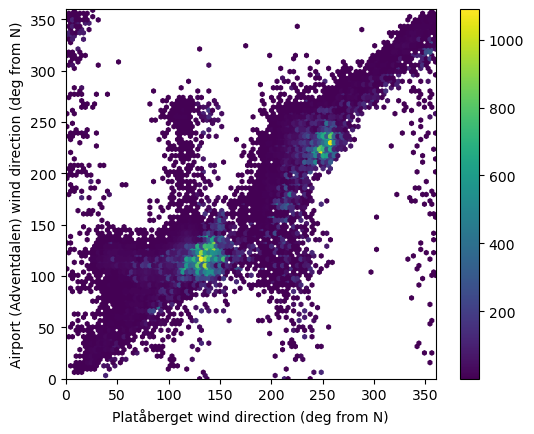

In [119]:
###### ALL WIND SPEEDS
#x = airport_plataberget_df.wd_plataberget
#y = airport_plataberget_df.wd_airport

###### For wind speeds > than some value in m/s
min_speed = 5
condi = airport_plataberget_df.ws_plataberget > min_speed
x = airport_plataberget_df.loc[condi].wd_plataberget
y = airport_plataberget_df.loc[condi].wd_airport

#airport_plataberget_df.plot.scatter(x='wd_plataberget', y='wd_airport')
fig,ax = plt.subplots()
pcm=ax.hexbin(x ,y , mincnt=1)
fig.colorbar(pcm)

ax.set_aspect('equal')
ax.set_xlim(0,360)
ax.set_ylim(0,360)
ax.set_xlabel('Platåberget wind direction (deg from N)')
ax.set_ylabel('Airport (Adventdalen) wind direction (deg from N)')

# Compare for different wind speeds

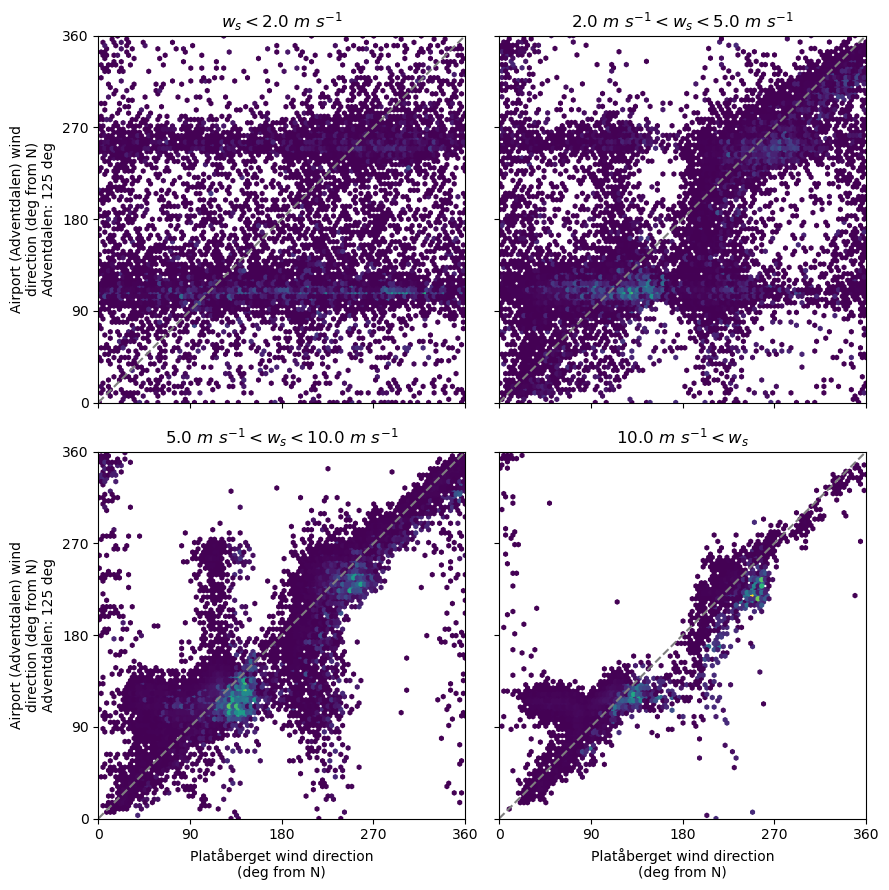

In [207]:
###### For wind speeds > than some value in m/s
wind_speeds = [2,5,10] # length L : L+1 plots
n_plots = len(wind_speeds)+1

if n_plots<3: 
    n_cols=n_plots
    n_rows=1
elif n_plots%2==0: 
    n_cols = 2    
else: 
    n_cols=3
    
n_rows = n_plots//n_cols + n_plots%n_cols


fig,axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(n_cols*3+3,n_rows*3+3), sharex=True, sharey=True)
axs = axs.ravel()

vmax=1000 # for scaling purposes
vmin=0

condi = airport_plataberget_df.ws_plataberget <= wind_speeds[0]
x = airport_plataberget_df.loc[condi].wd_plataberget
y = airport_plataberget_df.loc[condi].wd_airport
axs[0].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[0].set_title(r'$w_s < %.1f\ m\ s^{-1}$'%wind_speeds[0])

for i,ws in enumerate(wind_speeds[:-1]):
    condi = np.logical_and(airport_plataberget_df.ws_plataberget > wind_speeds[i],
                           airport_plataberget_df.ws_plataberget < wind_speeds[i+1])
    x = airport_plataberget_df.loc[condi].wd_plataberget
    y = airport_plataberget_df.loc[condi].wd_airport
    axs[i+1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
    axs[i+1].set_title(r'$%.1f\ m\ s^{-1} < w_s < %.1f\ m\ s^{-1}$'%(wind_speeds[i], wind_speeds[i+1]))
    

condi = airport_plataberget_df.ws_plataberget > wind_speeds[-1]
x = airport_plataberget_df.loc[condi].wd_plataberget
y = airport_plataberget_df.loc[condi].wd_airport
pcm = axs[-1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[-1].set_title(r'$ %.1f\ m\ s^{-1} < w_s$'%wind_speeds[-1])


for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(0,360)
    ax.set_ylim(0,360)
    ax.axline([0,0], slope=1, c='grey', ls='--')
    ax.set_xticks([0,90,180,270,360])
    ax.set_yticks([0,90,180,270,360])
    #ax.grid()

for i in [2,3]: axs[i].set_xlabel('Platåberget wind direction\n(deg from N)')
for i in [0,2]: axs[i].set_ylabel('Airport (Adventdalen) wind\ndirection (deg from N)\nAdventdalen: %i deg'
                 %(stations['SN99840']['valley_orientation']))
#fig.colorbar(pcm, ax=axs, orientation='horizontal', location='top', pad=-.45, shrink=.5, label='counts')

fig.tight_layout()

# Now for Adventdalen

In [216]:
ws_plataberget = stations['SN99843']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_plataberget'})
ws_adventdalen = stations['SN99870']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_adventdalen'})
wd_plataberget = stations['SN99843']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_plataberget'})
wd_adventdalen = stations['SN99870']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_adventdalen'})

print(ws_plataberget.timeResolution.value_counts(), ws_adventdalen.timeResolution.value_counts())
ws_adventdalen = ws_adventdalen.resample('h').mean(numeric_only=True).dropna(subset=['ws_adventdalen'])
wd_adventdalen = wd_adventdalen.resample('h').mean(numeric_only=True).dropna(subset=['wd_adventdalen'])

adventdalen_plataberget_df = pd.DataFrame(ws_adventdalen.copy()['ws_adventdalen'])

adventdalen_plataberget_df = adventdalen_plataberget_df.merge(wd_adventdalen.wd_adventdalen, left_index=True, right_index=True, how="left")
adventdalen_plataberget_df = adventdalen_plataberget_df.merge(ws_plataberget.ws_plataberget, left_index=True, right_index=True, how="left")
adventdalen_plataberget_df = adventdalen_plataberget_df.merge(wd_plataberget.wd_plataberget, left_index=True, right_index=True, how="left")

adventdalen_plataberget_df.dropna(axis=0, inplace=True)

timeResolution
PT1H    98605
Name: count, dtype: int64 timeResolution
PT1H    141234
Name: count, dtype: int64


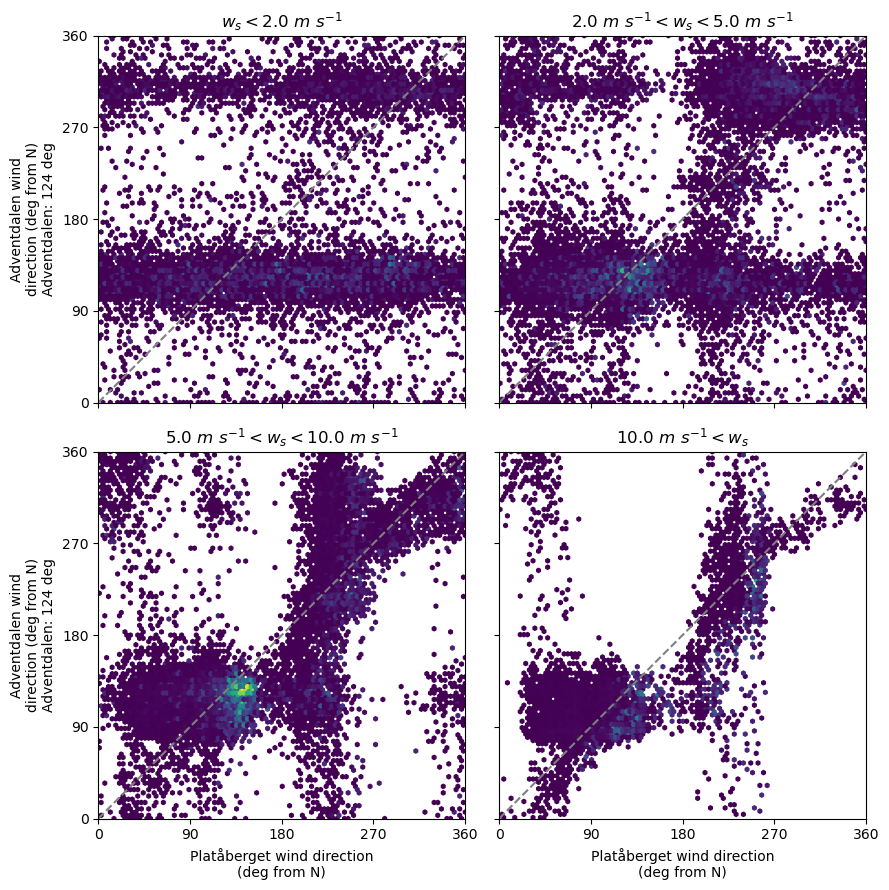

In [221]:
###### For wind speeds > than some value in m/s
#wind_speeds = [2,5,10] # length L : L+1 plots
wind_speeds = [2,5,10] # length L : L+1 plots
n_plots = len(wind_speeds)+1

if n_plots<3: 
    n_cols=n_plots
    n_rows=1
elif n_plots%2==0: 
    n_cols = 2    
else: 
    n_cols=3
    
n_rows = n_plots//n_cols + n_plots%n_cols


fig,axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(n_cols*3+3,n_rows*3+3), sharex=True, sharey=True)
axs = axs.ravel()

vmax=1000 # for scaling purposes
vmin=0

condi = adventdalen_plataberget_df.ws_plataberget <= wind_speeds[0]
x = adventdalen_plataberget_df.loc[condi].wd_plataberget
y = adventdalen_plataberget_df.loc[condi].wd_adventdalen
axs[0].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[0].set_title(r'$w_s < %.1f\ m\ s^{-1}$'%wind_speeds[0])

for i,ws in enumerate(wind_speeds[:-1]):
    condi = np.logical_and(adventdalen_plataberget_df.ws_plataberget > wind_speeds[i],
                           adventdalen_plataberget_df.ws_plataberget < wind_speeds[i+1])
    x = adventdalen_plataberget_df.loc[condi].wd_plataberget
    y = adventdalen_plataberget_df.loc[condi].wd_adventdalen
    axs[i+1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
    axs[i+1].set_title(r'$%.1f\ m\ s^{-1} < w_s < %.1f\ m\ s^{-1}$'%(wind_speeds[i], wind_speeds[i+1]))
    

condi = adventdalen_plataberget_df.ws_plataberget > wind_speeds[-1]
x = adventdalen_plataberget_df.loc[condi].wd_plataberget
y = adventdalen_plataberget_df.loc[condi].wd_adventdalen
pcm = axs[-1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[-1].set_title(r'$ %.1f\ m\ s^{-1} < w_s$'%wind_speeds[-1])


for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(0,360)
    ax.set_ylim(0,360)
    ax.axline([0,0], slope=1, c='grey', ls='--')
    ax.set_xticks([0,90,180,270,360])
    ax.set_yticks([0,90,180,270,360])
    #ax.grid()

for i in [2,3]: axs[i].set_xlabel('Platåberget wind direction\n(deg from N)')
for i in [0,2]: axs[i].set_ylabel('Adventdalen wind\ndirection (deg from N)\nAdventdalen: %i deg'
                 %(stations['SN99870']['valley_orientation']))
#fig.colorbar(pcm, ax=axs, orientation='horizontal', location='top', pad=-.45, shrink=.5, label='counts')

fig.tight_layout()

# Now for Longyeardalen - central

In [229]:
ws_plataberget = stations['SN99843']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_plataberget'})
ws_longyeardalen = stations['SN99857']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_longyeardalen'})
wd_plataberget = stations['SN99843']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_plataberget'})
wd_longyeardalen = stations['SN99857']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_longyeardalen'})
#SN99864   SN99858 SN99857
#print(ws_plataberget.timeResolution.value_counts(), ws_nybyen.timeResolution.value_counts())
ws_longyeardalen = ws_longyeardalen.resample('h').mean(numeric_only=True).dropna(subset=['ws_longyeardalen'])
wd_longyeardalen = wd_longyeardalen.resample('h').mean(numeric_only=True).dropna(subset=['wd_longyeardalen'])

longyeardalen_plataberget_df = pd.DataFrame(ws_longyeardalen.copy()['ws_longyeardalen'])

longyeardalen_plataberget_df = longyeardalen_plataberget_df.merge(wd_longyeardalen.wd_longyeardalen, left_index=True, right_index=True, how="left")
longyeardalen_plataberget_df = longyeardalen_plataberget_df.merge(ws_plataberget.ws_plataberget, left_index=True, right_index=True, how="left")
longyeardalen_plataberget_df = longyeardalen_plataberget_df.merge(wd_plataberget.wd_plataberget, left_index=True, right_index=True, how="left")

longyeardalen_plataberget_df.dropna(axis=0, inplace=True)

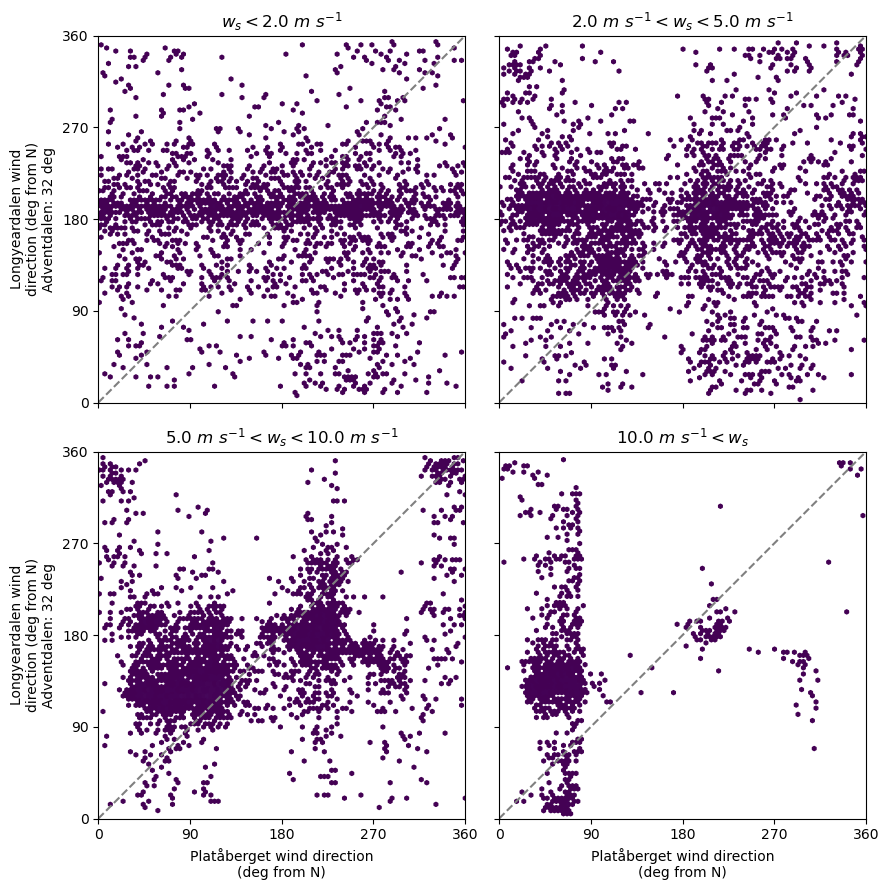

In [230]:
###### For wind speeds > than some value in m/s
#wind_speeds = [2,5,10] # length L : L+1 plots
wind_speeds = [2,5,10] # length L : L+1 plots
n_plots = len(wind_speeds)+1

if n_plots<3: 
    n_cols=n_plots
    n_rows=1
elif n_plots%2==0: 
    n_cols = 2    
else: 
    n_cols=3
    
n_rows = n_plots//n_cols + n_plots%n_cols


fig,axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(n_cols*3+3,n_rows*3+3), sharex=True, sharey=True)
axs = axs.ravel()

vmax=1000 # for scaling purposes
vmin=0

condi = longyeardalen_plataberget_df.ws_plataberget <= wind_speeds[0]
x = longyeardalen_plataberget_df.loc[condi].wd_plataberget
y = longyeardalen_plataberget_df.loc[condi].wd_longyeardalen
axs[0].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[0].set_title(r'$w_s < %.1f\ m\ s^{-1}$'%wind_speeds[0])

for i,ws in enumerate(wind_speeds[:-1]):
    condi = np.logical_and(longyeardalen_plataberget_df.ws_plataberget > wind_speeds[i],
                           longyeardalen_plataberget_df.ws_plataberget < wind_speeds[i+1])
    x = longyeardalen_plataberget_df.loc[condi].wd_plataberget
    y = longyeardalen_plataberget_df.loc[condi].wd_longyeardalen
    axs[i+1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
    axs[i+1].set_title(r'$%.1f\ m\ s^{-1} < w_s < %.1f\ m\ s^{-1}$'%(wind_speeds[i], wind_speeds[i+1]))
    

condi = longyeardalen_plataberget_df.ws_plataberget > wind_speeds[-1]
x = longyeardalen_plataberget_df.loc[condi].wd_plataberget
y = longyeardalen_plataberget_df.loc[condi].wd_longyeardalen
pcm = axs[-1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[-1].set_title(r'$ %.1f\ m\ s^{-1} < w_s$'%wind_speeds[-1])


for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(0,360)
    ax.set_ylim(0,360)
    ax.axline([0,0], slope=1, c='grey', ls='--')
    ax.set_xticks([0,90,180,270,360])
    ax.set_yticks([0,90,180,270,360])
    #ax.grid()

for i in [2,3]: axs[i].set_xlabel('Platåberget wind direction\n(deg from N)')
for i in [0,2]: axs[i].set_ylabel('Longyeardalen wind\ndirection (deg from N)\nAdventdalen: %i deg'
                 %(stations['SN99857']['valley_orientation']))
#fig.colorbar(pcm, ax=axs, orientation='horizontal', location='top', pad=-.45, shrink=.5, label='counts')

fig.tight_layout()

# Now compare Longyeardalen and Adventdalen

In [232]:
ws_longyeardalen = stations['SN99857']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_longyeardalen'})
ws_adventdalen = stations['SN99870']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_adventdalen'})
wd_longyeardalen = stations['SN99857']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_longyeardalen'})
wd_adventdalen = stations['SN99870']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_adventdalen'})

print(ws_plataberget.timeResolution.value_counts(), ws_adventdalen.timeResolution.value_counts())
ws_adventdalen = ws_adventdalen.resample('h').mean(numeric_only=True).dropna(subset=['ws_adventdalen'])
wd_adventdalen = wd_adventdalen.resample('h').mean(numeric_only=True).dropna(subset=['wd_adventdalen'])
ws_longyeardalen = ws_longyeardalen.resample('h').mean(numeric_only=True).dropna(subset=['ws_longyeardalen'])
wd_longyeardalen = wd_longyeardalen.resample('h').mean(numeric_only=True).dropna(subset=['wd_longyeardalen'])

adventdalen_longyeardalen_df = pd.DataFrame(ws_adventdalen.copy()['ws_adventdalen'])

adventdalen_longyeardalen_df = adventdalen_longyeardalen_df.merge(wd_adventdalen.wd_adventdalen, left_index=True, right_index=True, how="left")
adventdalen_longyeardalen_df = adventdalen_longyeardalen_df.merge(ws_longyeardalen.ws_longyeardalen, left_index=True, right_index=True, how="left")
adventdalen_longyeardalen_df = adventdalen_longyeardalen_df.merge(wd_longyeardalen.wd_longyeardalen, left_index=True, right_index=True, how="left")

adventdalen_longyeardalen_df.dropna(axis=0, inplace=True)

timeResolution
PT1H    98605
Name: count, dtype: int64 timeResolution
PT1H    141234
Name: count, dtype: int64


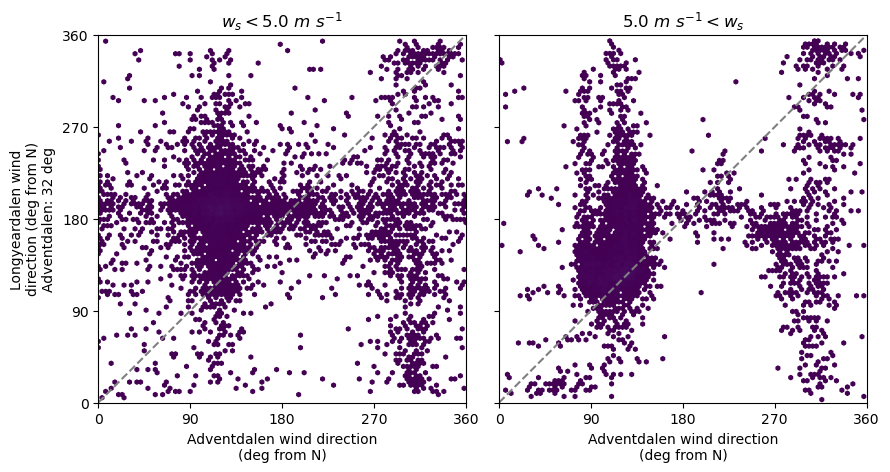

In [240]:
###### For wind speeds > than some value in m/s
wind_speeds = [5] # length L : L+1 plots
#wind_speeds = [2,5,10] # length L : L+1 plots
n_plots = len(wind_speeds)+1

if n_plots<3: 
    n_cols=n_plots
    n_rows=1
elif n_plots%2==0: 
    n_cols = 2    
else: 
    n_cols=3
    
n_rows = n_plots//n_cols + n_plots%n_cols


fig,axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(n_cols*3+3,n_rows*3+3), sharex=True, sharey=True)
axs = axs.ravel()

vmax=1000 # for scaling purposes
vmin=0

condi = adventdalen_longyeardalen_df.ws_adventdalen <= wind_speeds[0]
x = adventdalen_longyeardalen_df.loc[condi].wd_adventdalen
y = adventdalen_longyeardalen_df.loc[condi].wd_longyeardalen
axs[0].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[0].set_title(r'$w_s < %.1f\ m\ s^{-1}$'%wind_speeds[0])

for i,ws in enumerate(wind_speeds[:-1]):
    condi = np.logical_and(adventdalen_longyeardalen_df.ws_adventdalen > wind_speeds[i],
                           adventdalen_longyeardalen_df.ws_adventdalen < wind_speeds[i+1])
    x = adventdalen_longyeardalen_df.loc[condi].wd_adventdalen
    y = adventdalen_longyeardalen_df.loc[condi].wd_longyeardalen
    axs[i+1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
    axs[i+1].set_title(r'$%.1f\ m\ s^{-1} < w_s < %.1f\ m\ s^{-1}$'%(wind_speeds[i], wind_speeds[i+1]))
    

condi = adventdalen_longyeardalen_df.ws_adventdalen > wind_speeds[-1]
x = adventdalen_longyeardalen_df.loc[condi].wd_adventdalen
y = adventdalen_longyeardalen_df.loc[condi].wd_longyeardalen
pcm = axs[-1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[-1].set_title(r'$ %.1f\ m\ s^{-1} < w_s$'%wind_speeds[-1])


for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(0,360)
    ax.set_ylim(0,360)
    ax.axline([0,0], slope=1, c='grey', ls='--')
    ax.set_xticks([0,90,180,270,360])
    ax.set_yticks([0,90,180,270,360])
    #ax.grid()

for i in [0,1]: axs[i].set_xlabel('Adventdalen wind direction\n(deg from N)')
for i in [0]: axs[i].set_ylabel('Longyeardalen wind\ndirection (deg from N)\nAdventdalen: %i deg'
                 %(stations['SN99857']['valley_orientation']))
#fig.colorbar(pcm, ax=axs, orientation='horizontal', location='top', pad=-.45, shrink=.5, label='counts')

fig.tight_layout()

## Maybe Nybyen is better?

In [241]:
ws_nybyen = stations['SN99864']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_nybyen'})
ws_adventdalen = stations['SN99870']['wind_speed_data'].set_index('referenceTime').rename(columns={'value':'ws_adventdalen'})
wd_nybyen = stations['SN99864']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_nybyen'})
wd_adventdalen = stations['SN99870']['wind_direction_data'].set_index('referenceTime').rename(columns={'value':'wd_adventdalen'})

ws_adventdalen = ws_adventdalen.resample('h').mean(numeric_only=True).dropna(subset=['ws_adventdalen'])
wd_adventdalen = wd_adventdalen.resample('h').mean(numeric_only=True).dropna(subset=['wd_adventdalen'])
ws_nybyen = ws_nybyen.resample('h').mean(numeric_only=True).dropna(subset=['ws_nybyen'])
wd_nybyen = wd_nybyen.resample('h').mean(numeric_only=True).dropna(subset=['wd_nybyen'])

adventdalen_nybyen_df = pd.DataFrame(ws_adventdalen.copy()['ws_adventdalen'])

adventdalen_nybyen_df = adventdalen_nybyen_df.merge(wd_adventdalen.wd_adventdalen, left_index=True, right_index=True, how="left")
adventdalen_nybyen_df = adventdalen_nybyen_df.merge(ws_nybyen.ws_nybyen, left_index=True, right_index=True, how="left")
adventdalen_nybyen_df = adventdalen_nybyen_df.merge(wd_nybyen.wd_nybyen, left_index=True, right_index=True, how="left")

adventdalen_nybyen_df.dropna(axis=0, inplace=True)

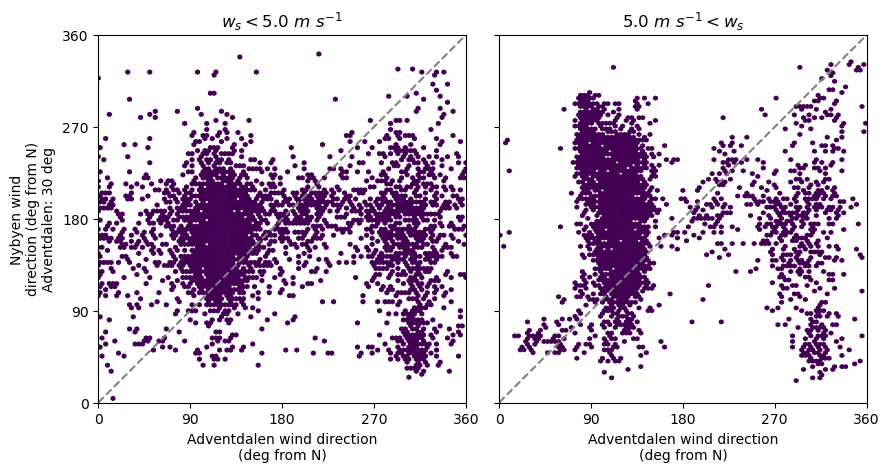

In [242]:
###### For wind speeds > than some value in m/s
wind_speeds = [5] # length L : L+1 plots
#wind_speeds = [2,5,10] # length L : L+1 plots
n_plots = len(wind_speeds)+1

if n_plots<3: 
    n_cols=n_plots
    n_rows=1
elif n_plots%2==0: 
    n_cols = 2    
else: 
    n_cols=3
    
n_rows = n_plots//n_cols + n_plots%n_cols


fig,axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(n_cols*3+3,n_rows*3+3), sharex=True, sharey=True)
axs = axs.ravel()

vmax=1000 # for scaling purposes
vmin=0

condi = adventdalen_nybyen_df.ws_adventdalen <= wind_speeds[0]
x = adventdalen_nybyen_df.loc[condi].wd_adventdalen
y = adventdalen_nybyen_df.loc[condi].wd_nybyen
axs[0].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[0].set_title(r'$w_s < %.1f\ m\ s^{-1}$'%wind_speeds[0])

for i,ws in enumerate(wind_speeds[:-1]):
    condi = np.logical_and(adventdalen_nybyen_df.ws_adventdalen > wind_speeds[i],
                           adventdalen_nybyen_df.ws_adventdalen < wind_speeds[i+1])
    x = adventdalen_nybyen_df.loc[condi].wd_adventdalen
    y = adventdalen_nybyen_df.loc[condi].wd_nybyen
    axs[i+1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
    axs[i+1].set_title(r'$%.1f\ m\ s^{-1} < w_s < %.1f\ m\ s^{-1}$'%(wind_speeds[i], wind_speeds[i+1]))
    

condi = adventdalen_nybyen_df.ws_adventdalen > wind_speeds[-1]
x = adventdalen_nybyen_df.loc[condi].wd_adventdalen
y = adventdalen_nybyen_df.loc[condi].wd_nybyen
pcm = axs[-1].hexbin(x ,y , mincnt=1, vmax=vmax, vmin=vmin)
axs[-1].set_title(r'$ %.1f\ m\ s^{-1} < w_s$'%wind_speeds[-1])


for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(0,360)
    ax.set_ylim(0,360)
    ax.axline([0,0], slope=1, c='grey', ls='--')
    ax.set_xticks([0,90,180,270,360])
    ax.set_yticks([0,90,180,270,360])
    #ax.grid()

for i in [0,1]: axs[i].set_xlabel('Adventdalen wind direction\n(deg from N)')
for i in [0]: axs[i].set_ylabel('Nybyen wind\ndirection (deg from N)\nAdventdalen: %i deg'
                 %(stations['SN99864']['valley_orientation']))
#fig.colorbar(pcm, ax=axs, orientation='horizontal', location='top', pad=-.45, shrink=.5, label='counts')

fig.tight_layout()